# **How to use a Pre-Trained model 🍧**

## **ToC**

1. How to load a pre-trained model for classification using **Keras**
  - [keras.preprocessing](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing)
  - [keras.applications](https://keras.io/api/applications/)
2. How to load a pre-trained model for classification using **PyTorch**
  - [timm](https://huggingface.co/docs/timm/en/quickstart)
  - [Pillow](https://python-pillow.github.io/)

## **Introduction**

In this laboratory lesson, we will see how to use pre-trained models for image classification. We will analyze this process using the Keras and PyTorch libraries.

We are going to use the VGG16 Neural Network (Visual Geometry Group 16-layer network). This is a deep convolutional neural network (CNN) architecture that was introduced by the Visual Geometry Group at the University of Oxford. It was a top-performing model in the ImageNet Large Scale Visual Recognition Challenge (ILSVRC) in 2014.

The **ImageNet** dataset is a large-scale visual database designed for computer vision research. It contains over 14 million labeled images spanning 1,000 object classes, including animals, vehicles, tools, and more. Each image is carefully annotated by humans and vary in dimensions and resolution.

Official website: https://image-net.org/<br>
Some images could be found here: https://github.com/EliSchwartz/imagenet-sample-images/blob/master/gallery.md

VGG16 Neural Network architecture:

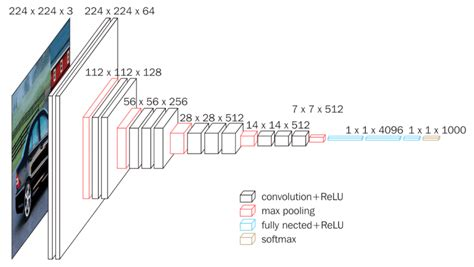

## How to load a pre-trained model for classification using **Keras**

Keras provides a vast set of pre-trained models through the [`keras.applications`](https://keras.io/api/applications/#usage-examples-for-image-classification-models) module.  

This allows us to instantiate ready-to-use models and load pre-trained weights in a very simple and fast way. Each model also comes with a function for input preprocessing (`preprocess_input`) and another to obtain the class name from the model's prediction (`decode_predictions`).

In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions

In [ ]:
# Load the VGG16 model pre-trained on ImageNet
model = VGG16(weights='imagenet')
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

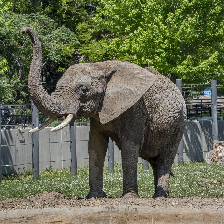

In [ ]:
# Load the image from disk with the target size of 224x224 as required by VGG16
img = image.load_img('elephant.jpg', target_size=(224, 224))
img

In [ ]:
# Convert the image to a numpy array
img_array = image.img_to_array(img)
display("TO NUMPY ARRAY", img_array)
print()

# Add an extra dimension for the batch size (required by the model)
img_array = np.expand_dims(img_array, axis=0)
display("AFTER DIM EXPAND", img_array.shape)
print()

# Preprocess the image to be compatible with VGG16
# This function does the following:
#   - convert the input images from RGB to BGR by swapping the color channels
#   - zero-center each color channel with respect to the ImageNet dataset
#     Zero-centering means subtracting the mean value of each color channel (for R, G, and B channels) from the respective pixel values in the image
img_array = preprocess_input(img_array)
print("AFTER PRE-PROCESSING")
display(img_array)
display(img_array.shape)

'TO NUMPY ARRAY'

array([[[177., 204., 109.],
        [ 71., 100.,   8.],
        [135., 157.,  92.],
        ...,
        [ 41.,  63.,  14.],
        [ 38.,  62.,  12.],
        [ 43.,  68.,  10.]],

       [[128., 155.,  60.],
        [179., 207., 120.],
        [ 43.,  68.,   0.],
        ...,
        [ 37.,  57.,   4.],
        [ 38.,  60.,  11.],
        [ 77.,  99.,  37.]],

       [[207., 227., 166.],
        [190., 212., 150.],
        [188., 212., 150.],
        ...,
        [ 41.,  60.,  15.],
        [ 44.,  60.,  15.],
        [ 60.,  81.,  16.]],

       ...,

       [[151., 133., 111.],
        [140., 122., 100.],
        [152., 134., 112.],
        ...,
        [180., 163., 147.],
        [155., 138., 122.],
        [168., 151., 135.]],

       [[138., 118.,  93.],
        [123., 105.,  81.],
        [153., 136., 110.],
        ...,
        [177., 160., 142.],
        [145., 130., 111.],
        [154., 139., 120.]],

       [[170., 150., 123.],
        [160., 142., 118.],
        [187., 1

'AFTER DIM EXPAND'

(1, 224, 224, 3)


AFTER PRE-PROCESSING


array([[[[   5.060997 ,   87.221    ,   53.32     ],
         [ -95.939    ,  -16.779    ,  -52.68     ],
         [ -11.939003 ,   40.221    ,   11.32     ],
         ...,
         [ -89.939    ,  -53.779    ,  -82.68     ],
         [ -91.939    ,  -54.779    ,  -85.68     ],
         [ -93.939    ,  -48.779    ,  -80.68     ]],

        [[ -43.939003 ,   38.221    ,    4.3199997],
         [  16.060997 ,   90.221    ,   55.32     ],
         [-103.939    ,  -48.779    ,  -80.68     ],
         ...,
         [ -99.939    ,  -59.779    ,  -86.68     ],
         [ -92.939    ,  -56.779    ,  -85.68     ],
         [ -66.939    ,  -17.779    ,  -46.68     ]],

        [[  62.060997 ,  110.221    ,   83.32     ],
         [  46.060997 ,   95.221    ,   66.32     ],
         [  46.060997 ,   95.221    ,   64.32     ],
         ...,
         [ -88.939    ,  -56.779    ,  -82.68     ],
         [ -88.939    ,  -56.779    ,  -79.68     ],
         [ -87.939    ,  -35.779    ,  -63.68     ]],

(1, 224, 224, 3)

In [ ]:
# Make the prediction
predictions = model.predict(img_array)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [ ]:
# Decode the predictions into a readable format
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Print the top 3 predictions
print("Top 3 predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i+1}. {label}: {score*100:.2f}%")

Top 3 predictions:
1. African_elephant: 79.68%
2. tusker: 10.67%
3. Indian_elephant: 9.23%


## How to load a pre-trained model for classification using **Pytorch**

timm (Torch Image Models) is a powerful library for PyTorch that provides a vast collection of pre-trained image models, including state-of-the-art architectures like Vision Transformers (ViTs), EfficientNet, and ConvNeXt. It is designed for flexibility, allowing users to fine-tune models on custom datasets with ease. The library also includes efficient data loaders, augmentations, and various utilities for training deep learning models. With over a thousand model variants optimized for performance and efficiency, timm is widely used in computer vision tasks such as classification, segmentation, and object detection.

timm library documentation: https://huggingface.co/docs/timm/main/en/index<br>
About VGG16 in timm library: https://huggingface.co/timm/vgg16.tv_in1k

In [ ]:
import timm
import torch
from PIL import Image
import pandas as pd

In [ ]:
# Instanciate VGG and load pre-trained weights
# 'in1k' means: ImageNet 1k labels (the original imagenet)
model = timm.create_model('vgg16.tv_in1k', pretrained=True)
model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
# download the ImageNate unique labels
!wget https://gist.githubusercontent.com/ageitgey/4e1342c10a71981d0b491e1b8227328b/raw/24d78ea09a31fdff540a8494886e0051e3ad68f8/imagenet_classes.txt

--2025-03-11 22:18:24--  https://gist.githubusercontent.com/ageitgey/4e1342c10a71981d0b491e1b8227328b/raw/24d78ea09a31fdff540a8494886e0051e3ad68f8/imagenet_classes.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15543 (15K) [text/plain]
Saving to: ‘imagenet_classes.txt.1’

imagenet_classes.tx 100%[===================>]  15.18K  --.-KB/s    in 0.001s  

2025-03-11 22:18:24 (22.3 MB/s) - ‘imagenet_classes.txt.1’ saved [15543/15543]



In [ ]:
# load data from csv text to Pandas DataFrame
labels = pd.read_csv('imagenet_classes.txt', skiprows=4, header=None)
labels.columns = ['index', 'name']
labels

index                name
0        0               tench
1        1            goldfish
2        2   great_white_shark
3        3         tiger_shark
4        4          hammerhead
..     ...                 ...
995    995           earthstar
996    996    hen-of-the-woods
997    997              bolete
998    998                 ear
999    999       toilet_tissue

[1000 rows x 2 columns]

In [ ]:
# this is a way we ca get label name knowing its value
# other ways are possible: using just an array
labels.query("index==0")

index    name
0      0   tench

In [ ]:
# get model specific transforms (normalization, resize)
# each model comes with a custom image pre-processing steps we have to obtain this
# and create a transformation object to pre-process images
data_config = timm.data.resolve_model_data_config(model)
transforms = timm.data.create_transform(**data_config, is_training=False)

In [ ]:
display(data_config)

# About the Normalize block:
#    We are making a Standardization (Mean Subtraction + Division by Standard Deviation)
#    This makes the distribution of pixel values have a mean of 0 and a standard deviation of 1.
# MayBeToTensor() cast to Tensor if not already a tensor
display(transforms)

{'input_size': (3, 224, 224),
 'interpolation': 'bilinear',
 'mean': (0.485, 0.456, 0.406),
 'std': (0.229, 0.224, 0.225),
 'crop_pct': 0.875,
 'crop_mode': 'center'}

Compose(
    Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
    CenterCrop(size=(224, 224))
    MaybeToTensor()
    Normalize(mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]))
)

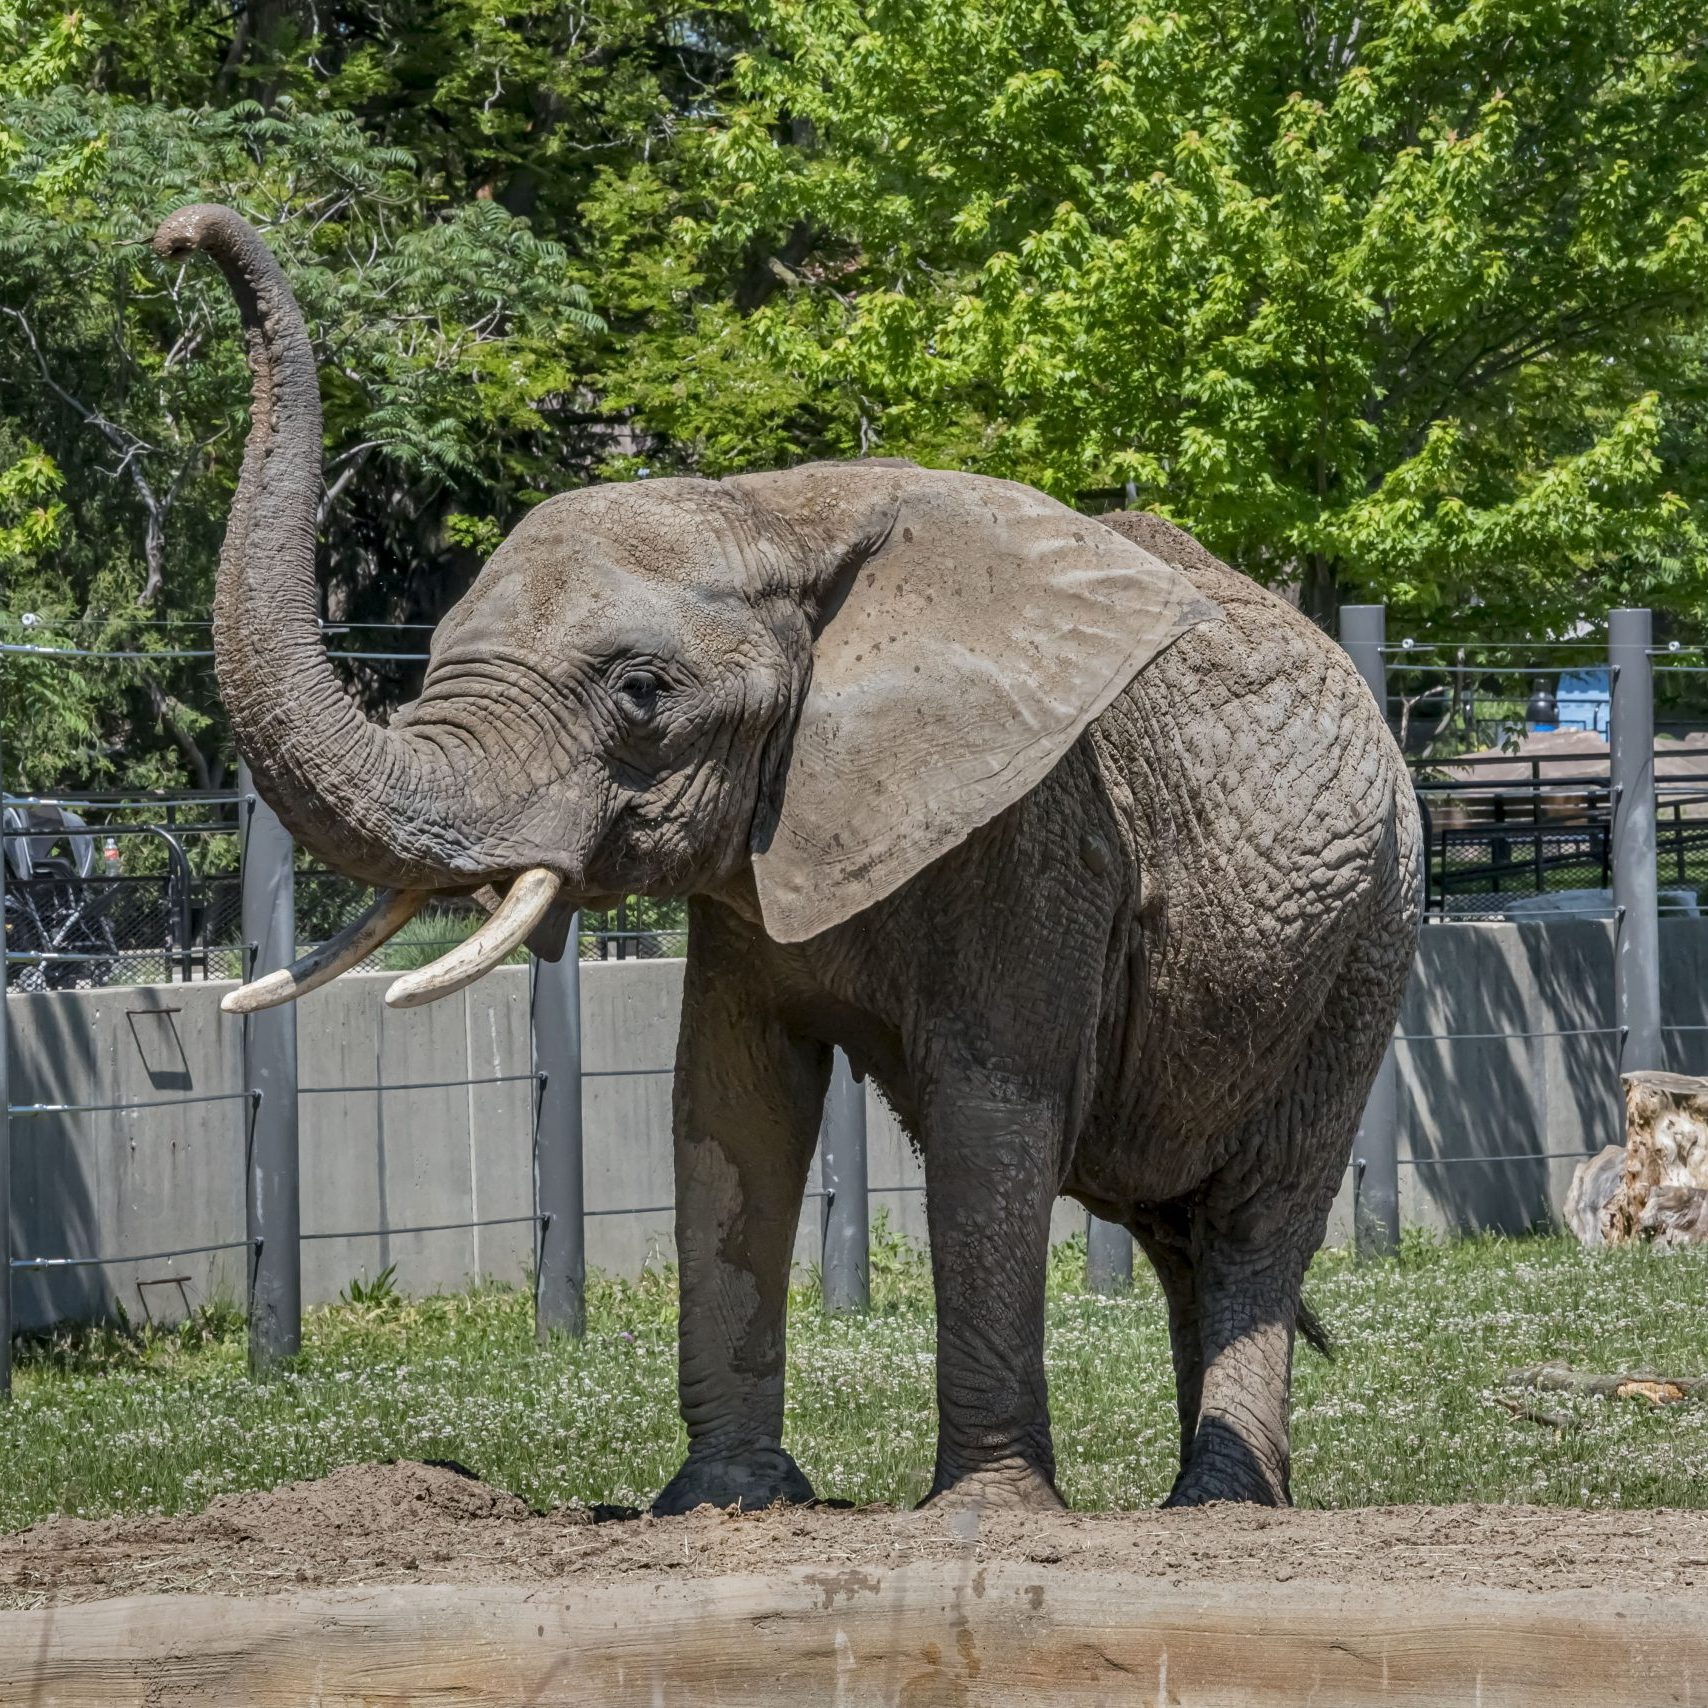

In [ ]:
# Load image from disk using PILLOW
img = Image.open("elephant.jpg")
display(img)

torch.Size([1, 3, 224, 224])


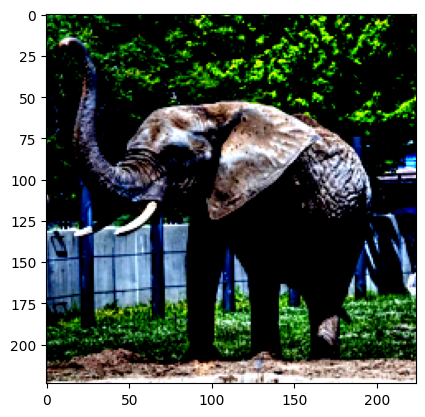

In [ ]:
x = transforms(img) # preprocessing

# here we can print the resulting image
import matplotlib.pyplot as plt
plt.imshow(x.permute(1,2,0))

x = x.unsqueeze(0)  # transform single tensor (unbatched) data into a batched one (made by 1 batch)
print(x.shape)

In [ ]:
# Run model inference
output = model(x)

In [ ]:
## Print the top 3 predictions
top5_probabilities, top5_class_indices = torch.topk(output.softmax(dim=1) * 100, k=5)
for p, c in zip(top5_probabilities[0], top5_class_indices[0]):
  print(f"{labels.query('index=='+str(c.item())).name.item()} ({c.item()}): {p.item()}%")

 African_elephant (386): 97.59182739257812%
 Indian_elephant (385): 1.3972492218017578%
 tusker (101): 1.0104901790618896%
 triceratops (51): 0.0002780352078843862%
 Arabian_camel (354): 0.00010415606084279716%
